# Credit Risk Modelling: Project
Antoni Ballaun, Laura Hoang, Jędrzej Joniec, Piotr Zambrzycki

## 01. Data preparation: missing data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import os
# os.getcwd()

In [3]:
df = pd.read_csv('prosperLoanData.csv')

In [4]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


### Modifying `LoanStatus`

In [5]:
df['LoanStatus'].unique()

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'], dtype=object)

In [6]:
df['LoanStatus'].value_counts()

LoanStatus
Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: count, dtype: int64

If past due > 90 days we it will be considered a default(1), else non-default(0), Canceled will be dropped hard to say what it means and there is only 5 of them 

In [7]:
values_to_make_ones = ['Past Due (91-120 days)', 'Past Due (>120 days)', 'Defaulted', 'Chargedoff']

In [8]:
df = df[df['LoanStatus'] != 'Cancelled']

### Creation of `Defaulted` column - our target variable

In [9]:
df['Defaulted'] = np.where(df['LoanStatus'].isin(values_to_make_ones),1,0)

<Axes: xlabel='Defaulted', ylabel='percent'>

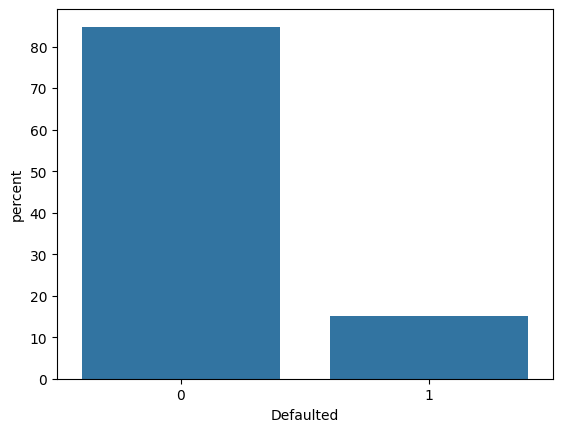

In [10]:
sns.countplot(data=df,x='Defaulted', stat='percent',)
# sns.countplot(data=df,x='Defaulted')

### Missing data

#### Removing columns with missing data

In [11]:
missing_percents = (df.isna().sum().sort_values(ascending=False))/len(df) 

If missing values are greater than 20%, the column will be dropped, imputing without introducing a high level of bias would be very hard.

In [12]:
print(missing_percents[missing_percents >= 0.2])
list_of_cols_missing_more_than25 = list(missing_percents[missing_percents >= 0.2].index)

GroupKey                               0.882913
LoanFirstDefaultedCycleNumber          0.851209
ScorexChangeAtTimeOfListing            0.833866
ProsperPrincipalBorrowed               0.806156
TotalProsperLoans                      0.806156
TotalProsperPaymentsBilled             0.806156
OnTimeProsperPayments                  0.806156
ProsperPaymentsOneMonthPlusLate        0.806156
ProsperPrincipalOutstanding            0.806156
ProsperPaymentsLessThanOneMonthLate    0.806156
CreditGrade                            0.745919
ClosedDate                             0.516519
ProsperRating (numeric)                0.255231
EstimatedReturn                        0.255231
EstimatedLoss                          0.255231
EstimatedEffectiveYield                0.255231
ProsperScore                           0.255231
ProsperRating (Alpha)                  0.255231
dtype: float64


In [13]:
df = df.drop(list_of_cols_missing_more_than25,axis=1)

#### Rows with missing data: removing chosen ones

In [14]:
missing_percents = (df.isna().sum().sort_values(ascending=False))/len(df)
print(missing_percents[missing_percents > 0])

DebtToIncomeRatio                     0.075080
EmploymentStatusDuration              0.066891
AmountDelinquent                      0.066864
CurrentCreditLines                    0.066706
OpenCreditLines                       0.066706
PublicRecordsLast12Months             0.066706
BankcardUtilization                   0.066706
RevolvingCreditBalance                0.066706
AvailableBankcardCredit               0.066180
TotalTrades                           0.066180
TradesOpenedLast6Months               0.066180
TradesNeverDelinquent (percentage)    0.066180
BorrowerState                         0.048380
Occupation                            0.031466
EmploymentStatus                      0.019766
TotalInquiries                        0.010138
DelinquenciesLast7Years               0.008663
CurrentDelinquencies                  0.006109
PublicRecordsLast10Years              0.006109
TotalCreditLinespast7years            0.006109
InquiriesLast6Months                  0.006109
FirstRecorded

In [15]:
missing_amounts = df.isna().sum().sort_values(ascending=False)
missing_amounts[missing_amounts > 0]

DebtToIncomeRatio                     8554
EmploymentStatusDuration              7621
AmountDelinquent                      7618
CurrentCreditLines                    7600
OpenCreditLines                       7600
PublicRecordsLast12Months             7600
BankcardUtilization                   7600
RevolvingCreditBalance                7600
AvailableBankcardCredit               7540
TotalTrades                           7540
TradesOpenedLast6Months               7540
TradesNeverDelinquent (percentage)    7540
BorrowerState                         5512
Occupation                            3585
EmploymentStatus                      2252
TotalInquiries                        1155
DelinquenciesLast7Years                987
CurrentDelinquencies                   696
PublicRecordsLast10Years               696
TotalCreditLinespast7years             696
InquiriesLast6Months                   696
FirstRecordedCreditLine                696
CreditScoreRangeUpper                  590
CreditScore

In [16]:
len(df)

113932

There are 113k observations so we will drop missing rows for if less than 1000 is missing

# (DO poprawy !!!)

In [17]:
missing_amounts_less_than_1000 = missing_amounts[(missing_amounts > 0) & (missing_amounts < 1000)]

In [18]:
list_of_missing_to_drop_rows = list(missing_amounts_less_than_1000.index)

In [19]:
list_of_missing_to_drop_rows

['DelinquenciesLast7Years',
 'CurrentDelinquencies',
 'PublicRecordsLast10Years',
 'TotalCreditLinespast7years',
 'InquiriesLast6Months',
 'FirstRecordedCreditLine',
 'CreditScoreRangeUpper',
 'CreditScoreRangeLower',
 'BorrowerAPR']

In [20]:
df2 = df[list_of_missing_to_drop_rows].dropna(axis=0,)

In [21]:
df2.shape

(112945, 9)

In [22]:
df2.columns

Index(['DelinquenciesLast7Years', 'CurrentDelinquencies',
       'PublicRecordsLast10Years', 'TotalCreditLinespast7years',
       'InquiriesLast6Months', 'FirstRecordedCreditLine',
       'CreditScoreRangeUpper', 'CreditScoreRangeLower', 'BorrowerAPR'],
      dtype='object')

In [23]:
df3 = pd.merge(df,df2,how='inner')

In [24]:
df3.shape

(114805, 64)

#### Filling rest of missing values: data imputation

In [25]:
missings_to_process = df3.isnull().sum().sort_values(ascending=False)
missings_to_process = missings_to_process[missings_to_process > 0]

In [26]:
missings_to_process = list(missings_to_process.index)

In [27]:
missings_to_process

['DebtToIncomeRatio',
 'EmploymentStatusDuration',
 'OpenCreditLines',
 'RevolvingCreditBalance',
 'PublicRecordsLast12Months',
 'CurrentCreditLines',
 'BankcardUtilization',
 'AmountDelinquent',
 'AvailableBankcardCredit',
 'TotalTrades',
 'TradesOpenedLast6Months',
 'TradesNeverDelinquent (percentage)',
 'BorrowerState',
 'Occupation',
 'EmploymentStatus',
 'TotalInquiries']

##### 1) Debt to income ratio
`DebtToIncomeRatio` - the debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).

<Axes: xlabel='DebtToIncomeRatio', ylabel='Count'>

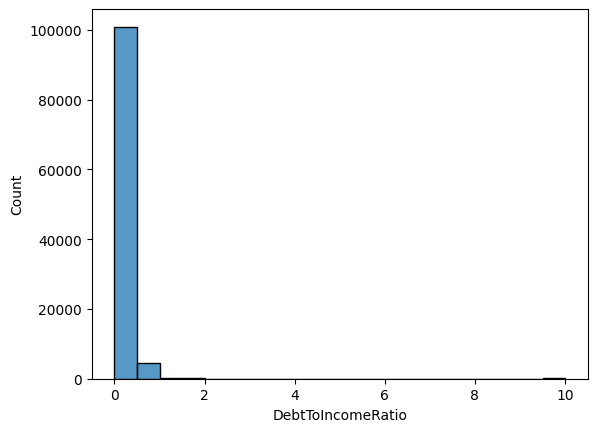

In [28]:
sns.histplot(data=df3,x='DebtToIncomeRatio',bins=20)

In [29]:
mean_debt = df3['DebtToIncomeRatio'].mean()

In [30]:
df3['DebtToIncomeRatio'] = df3['DebtToIncomeRatio'].fillna(value=mean_debt)

EmploymentStatusDuration

<Axes: xlabel='EmploymentStatusDuration', ylabel='Count'>

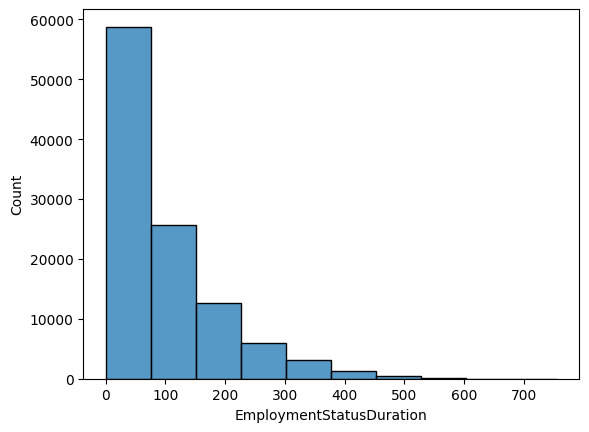

In [31]:
sns.histplot(data=df3,x='EmploymentStatusDuration',bins=10)

In [32]:
mode_employment = df3['EmploymentStatusDuration'].mode()

In [33]:
type(mode_employment)

pandas.core.series.Series

We don't have information, why there is missing data here so we chose the mode.

In [34]:
df3['EmploymentStatusDuration'] = df3['EmploymentStatusDuration'].fillna(value=0)

In [35]:
df3['BankcardUtilization'].unique()

array([0.  , 0.21,  nan, 0.04, 0.81, 0.39, 0.72, 0.13, 0.11, 0.51, 0.32,
       0.7 , 0.43, 0.97, 1.  , 0.54, 0.6 , 0.95, 0.08, 0.4 , 0.84, 0.17,
       0.07, 0.3 , 0.09, 0.31, 0.34, 0.8 , 0.01, 0.91, 0.58, 0.55, 0.93,
       0.1 , 0.46, 0.69, 0.74, 0.63, 0.68, 0.36, 0.37, 0.61, 0.87, 0.45,
       0.57, 0.59, 0.41, 0.89, 0.19, 0.94, 0.9 , 0.79, 0.76, 0.86, 0.53,
       0.48, 0.73, 0.05, 0.98, 0.99, 0.29, 0.92, 0.03, 0.22, 0.56, 0.64,
       0.83, 0.96, 0.35, 0.5 , 0.14, 1.31, 0.33, 0.27, 0.24, 0.44, 0.62,
       0.82, 0.12, 0.71, 0.52, 0.42, 0.16, 0.88, 0.23, 0.25, 0.06, 0.75,
       0.65, 1.04, 0.78, 0.77, 0.47, 0.49, 0.85, 0.66, 0.38, 1.01, 0.15,
       0.26, 0.67, 1.03, 0.28, 1.1 , 1.34, 1.09, 0.02, 1.2 , 0.2 , 1.02,
       0.18, 1.05, 1.12, 1.3 , 1.35, 1.13, 1.08, 1.07, 1.14, 1.16, 1.06,
       1.15, 1.59, 1.21, 1.19, 1.22, 4.73, 1.18, 1.23, 1.25, 1.54, 1.17,
       1.26, 1.61, 1.81, 1.11, 1.32, 1.75, 1.24, 1.76, 1.65, 1.51, 1.57,
       1.62, 1.27, 1.5 , 5.95, 1.38, 1.29, 1.36, 1.

<Axes: xlabel='BankcardUtilization', ylabel='Count'>

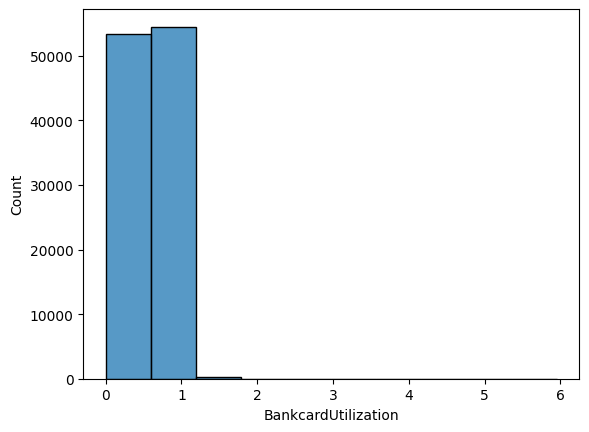

In [36]:
sns.histplot(data=df3,x='BankcardUtilization',bins=10)

In [37]:
mean_utilization = df3['BankcardUtilization'].mean()

In [38]:
df3['BankcardUtilization'] = df3['BankcardUtilization'].fillna(value=mean_utilization)

<Axes: xlabel='RevolvingCreditBalance', ylabel='Count'>

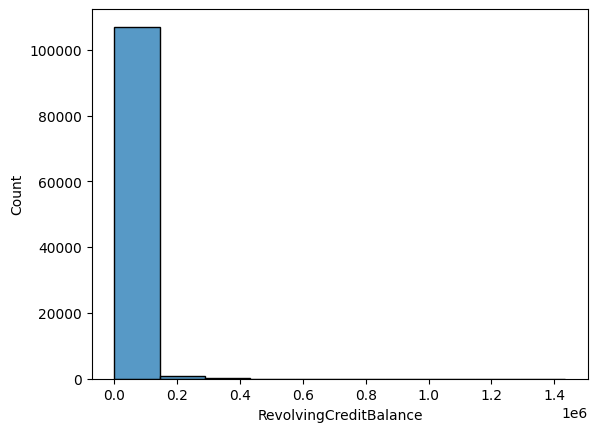

In [39]:
sns.histplot(data=df3,x='RevolvingCreditBalance',bins=10)

In [40]:
median_balance = df3['RevolvingCreditBalance'].median()

In [41]:
df3['RevolvingCreditBalance'].describe()

count    1.081690e+05
mean     1.761335e+04
std      3.290533e+04
min      0.000000e+00
25%      3.167000e+03
50%      8.587000e+03
75%      1.953900e+04
max      1.435667e+06
Name: RevolvingCreditBalance, dtype: float64

In [42]:
df3['RevolvingCreditBalance'] = df3['RevolvingCreditBalance'].fillna(value=median_balance)

In [43]:
df3['PublicRecordsLast12Months']

0         0.0
1         0.0
2         NaN
3         0.0
4         0.0
         ... 
114800    0.0
114801    0.0
114802    0.0
114803    0.0
114804    0.0
Name: PublicRecordsLast12Months, Length: 114805, dtype: float64

<Axes: xlabel='PublicRecordsLast12Months', ylabel='Count'>

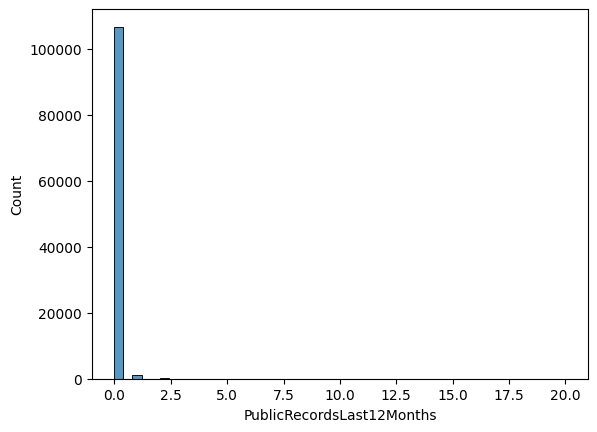

In [44]:
sns.histplot(data=df3,x='PublicRecordsLast12Months',bins=50)

In [45]:
df3['PublicRecordsLast12Months'].value_counts()

PublicRecordsLast12Months
0.0     106775
1.0       1257
2.0         96
3.0         28
4.0         10
7.0          2
20.0         1
Name: count, dtype: int64

In [46]:
df3['PublicRecordsLast12Months'] = df3['PublicRecordsLast12Months'].fillna(value=0.0)

OpenCreditLines is the same as Currentcredit line so we will drop one of them

In [47]:
df3 = df3.drop('CurrentCreditLines',axis=1)

Można wypełnić na podstawie drugiej!

<Axes: xlabel='OpenCreditLines', ylabel='Count'>

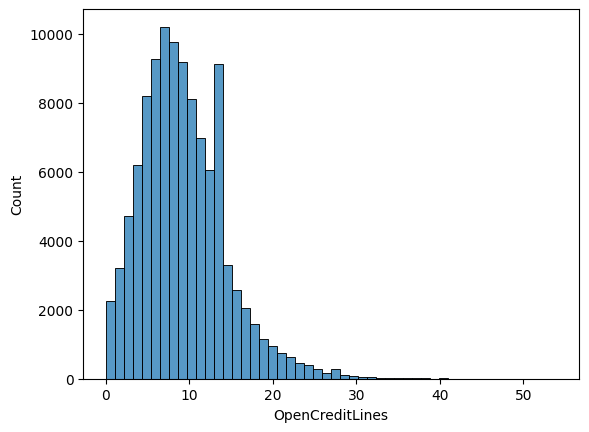

In [48]:
sns.histplot(data=df3,x='OpenCreditLines',bins=50)

In [49]:
df3['OpenCreditLines'].value_counts()

OpenCreditLines
7.0     10208
8.0      9756
6.0      9265
9.0      9191
5.0      8198
10.0     8115
11.0     6981
4.0      6195
12.0     6043
13.0     5005
3.0      4732
14.0     4113
15.0     3293
2.0      3203
16.0     2559
17.0     2052
1.0      1689
18.0     1574
19.0     1145
20.0      942
21.0      757
22.0      627
0.0       561
23.0      449
24.0      386
25.0      282
26.0      160
27.0      142
28.0      138
29.0       96
30.0       68
31.0       61
32.0       41
33.0       33
34.0       26
35.0       22
38.0       11
37.0       11
36.0       11
40.0        4
39.0        4
41.0        4
45.0        3
42.0        2
44.0        2
43.0        2
48.0        2
54.0        1
51.0        1
46.0        1
47.0        1
49.0        1
Name: count, dtype: int64

In [50]:
df3['OpenCreditLines'] = df3['OpenCreditLines'].fillna(df3['OpenCreditLines'].mean())

Amount Delinqeunt

In [51]:
df3['AmountDelinquent'].median()

np.float64(0.0)

In [52]:
df3['AmountDelinquent'] = df3['AmountDelinquent'].fillna(value=0.0)

In [53]:
df3['TotalTrades']

0         11.0
1         29.0
2          NaN
3         26.0
4         39.0
          ... 
114800    37.0
114801    39.0
114802    25.0
114803    19.0
114804    36.0
Name: TotalTrades, Length: 114805, dtype: float64

<Axes: xlabel='TotalTrades', ylabel='Count'>

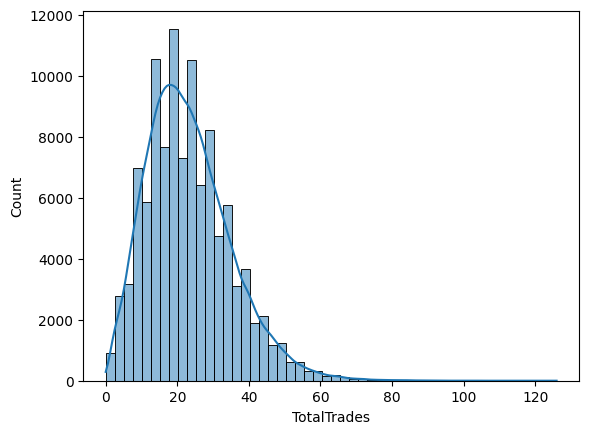

In [54]:
sns.histplot(data=df3,x='TotalTrades',bins=50,kde=True)

In [55]:
df3['TotalTrades'] = df3['TotalTrades'].fillna(value=df3['TotalTrades'].mean())

In [56]:
df3['TradesOpenedLast6Months'].nunique()

19

<Axes: xlabel='TradesOpenedLast6Months', ylabel='count'>

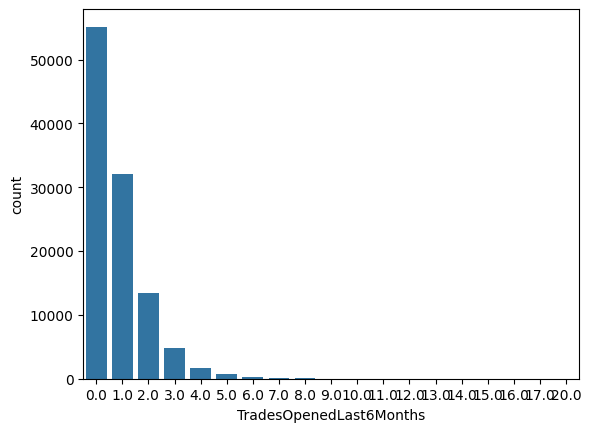

In [57]:
sns.countplot(data=df3,x='TradesOpenedLast6Months',)

In [58]:
df3['TradesOpenedLast6Months'] = df3['TradesOpenedLast6Months'].fillna(method='ffill')

In [59]:
df3['TradesNeverDelinquent (percentage)'].value_counts()

TradesNeverDelinquent (percentage)
1.00    42645
0.96     4327
0.95     3821
0.90     3209
0.94     3127
        ...  
0.32        5
0.06        3
0.99        1
0.03        1
0.49        1
Name: count, Length: 98, dtype: int64

<Axes: xlabel='TradesNeverDelinquent (percentage)', ylabel='Count'>

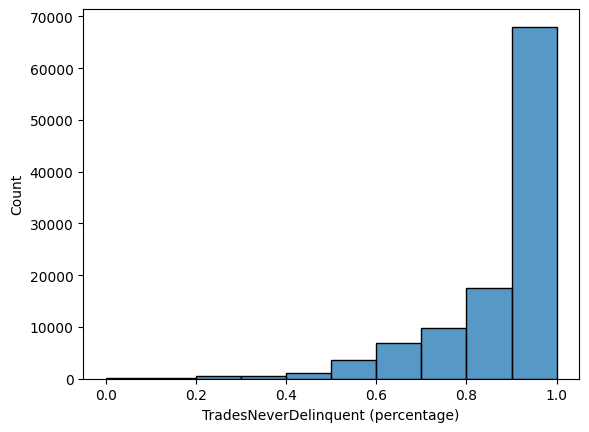

In [60]:
sns.histplot(data=df3,x='TradesNeverDelinquent (percentage)',bins=10)

In [61]:
df3['TradesNeverDelinquent (percentage)'].mean()

np.float64(0.8866415959049037)

In [62]:
df3['TradesNeverDelinquent (percentage)'] = df3['TradesNeverDelinquent (percentage)'].fillna(df3['TradesNeverDelinquent (percentage)'].mean())

<Axes: xlabel='AvailableBankcardCredit', ylabel='Count'>

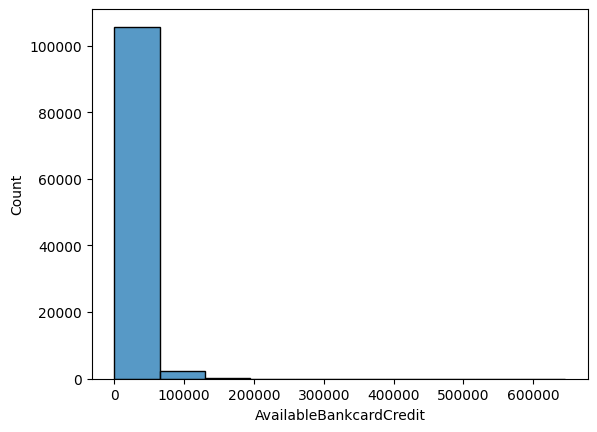

In [63]:
sns.histplot(data=df3,x='AvailableBankcardCredit',bins=10)

In [64]:
df3['AvailableBankcardCredit'].mean()

np.float64(11220.777014977779)

In [65]:
df3['AvailableBankcardCredit'] = df3['AvailableBankcardCredit'].fillna(df3['AvailableBankcardCredit'].mean())

In [66]:
df3 = df3.drop('Occupation',axis=1)

In [67]:
df3['BorrowerState'] = df3['BorrowerState'].fillna(method='ffill')

In [68]:
df3['EmploymentStatus'].unique()

array(['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other',
       nan, 'Not employed', 'Part-time', 'Retired'], dtype=object)

In [69]:
df3['EmploymentStatus'] = df3['EmploymentStatus'].fillna(method='ffill')

In [70]:
df3['TotalInquiries'].value_counts()

TotalInquiries
2.0      15108
3.0      14182
1.0      13973
4.0      12407
5.0      10312
         ...  
75.0         1
377.0        1
95.0         1
88.0         1
158.0        1
Name: count, Length: 102, dtype: int64

<Axes: xlabel='TotalInquiries', ylabel='Count'>

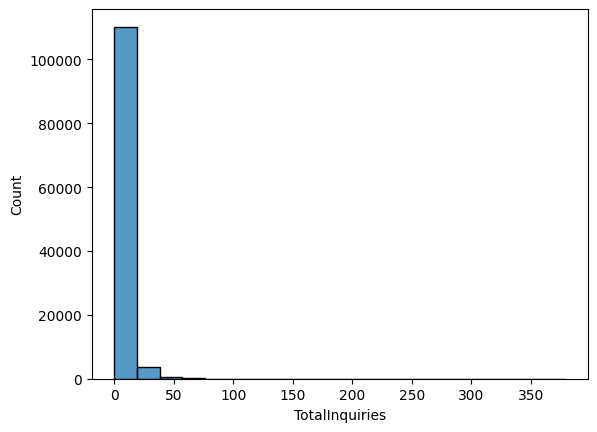

In [71]:
sns.histplot(data=df3,x='TotalInquiries',bins=20)

In [72]:
df3['TotalInquiries'].median()

np.float64(4.0)

In [73]:
df3['TotalInquiries'] = df3['TotalInquiries'].fillna(value=4)

In [74]:
df3.isnull().sum().sort_values(ascending=False)

ListingKey                     0
ListingNumber                  0
ListingCreationDate            0
Term                           0
LoanStatus                     0
                              ..
Recommendations                0
InvestmentFromFriendsCount     0
InvestmentFromFriendsAmount    0
Investors                      0
Defaulted                      0
Length: 62, dtype: int64

In [75]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114805 entries, 0 to 114804
Data columns (total 62 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   ListingKey                          114805 non-null  object 
 1   ListingNumber                       114805 non-null  int64  
 2   ListingCreationDate                 114805 non-null  object 
 3   Term                                114805 non-null  int64  
 4   LoanStatus                          114805 non-null  object 
 5   BorrowerAPR                         114805 non-null  float64
 6   BorrowerRate                        114805 non-null  float64
 7   LenderYield                         114805 non-null  float64
 8   ListingCategory (numeric)           114805 non-null  int64  
 9   BorrowerState                       114805 non-null  object 
 10  EmploymentStatus                    114805 non-null  object 
 11  EmploymentStatusDuration  

In [76]:
df3.head()

,ListingKey,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,ListingCategory (numeric),BorrowerState,...,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,Defaulted
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,36,Completed,0.16516,0.1580,0.1380,0,CO,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258,0
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,36,Current,0.12016,0.0920,0.0820,2,CO,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,0
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,36,Completed,0.28269,0.2750,0.2400,0,GA,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41,0
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,36,Current,0.12528,0.0974,0.0874,16,GA,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158,0
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,36,Current,0.24614,0.2085,0.1985,2,MN,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20,0


In [77]:
df3.to_csv('filled_missings_df.csv', index=True)

# TODO:
0. Wywal bezsensowe zmienne
1. Zbadać korelacje
2. Poszeregować na podstawie entropii
3. Ustalić punkt odcięcia
4. Feature selection drzewami
5. Zbuduj modele
6. Interpretacja wyników